# Eastern Washington Digital Equity

## Nicholas Tran, Juliana Reyes, Trevor Myers

# PCA - Method 1

jupyter nbconvert notebooks/pca_method2.ipynb --to slides --post serve --SlidesExporter.reveal_scroll=True

## Use PC1 As Index

## Use Correlation P Values for Feature Selection

## Create New Dataset w/ Removed Variables

## Use Stepwise Regression for Final Coefficients

## Prepare The Data

### Load The Libraries

In [1]:
library(tidyverse, quietly = TRUE)
library(psych, quietly = TRUE)
library(Hmisc, quietly = TRUE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘Hmisc’


The following object is masked from ‘package:psych’:

    describe


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




### Get The Data

In [11]:
data <- read.csv("../data/combined_data.csv")
head(data)

,NAME,GEOID,with_internet,work_from_home,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Census Tract 9601, Asotin County, Washington",53003960100,1569,145,1337,73942,12,58.00000,110.3274,41.78210,51.70445
2,"Census Tract 9602, Asotin County, Washington",53003960200,1780,421,1352,72988,13,60.07692,145.7848,22.88731,24.62630
3,"Census Tract 9603, Asotin County, Washington",53003960300,1156,6,396,38077,11,60.00000,173.4079,27.06202,29.98058
4,"Census Tract 9604, Asotin County, Washington",53003960400,805,29,647,38777,8,62.50000,127.6005,23.53829,22.16379
5,"Census Tract 9605, Asotin County, Washington",53003960500,1198,26,635,42639,8,62.50000,192.4299,21.68565,21.66087
6,"Census Tract 9606, Asotin County, Washington",53003960600,1392,115,909,53947,9,58.88889,151.0552,23.52123,26.18557


In [12]:
as.list(names(data))

[[1]]
[1] "NAME"

[[2]]
[1] "GEOID"

[[3]]
[1] "with_internet"

[[4]]
[1] "work_from_home"

[[5]]
[1] "sixtyfive_and_older"

[[6]]
[1] "median_income"

[[7]]
[1] "number_providers"

[[8]]
[1] "mean_lowest_cost"

[[9]]
[1] "mean_d_mbps"

[[10]]
[1] "mean_u_mbps"

[[11]]
[1] "mean_lat_ms"

#### Remove Unnecessary Columns

In [13]:
data <- data %>% dplyr::select(-NAME, -GEOID, -mean_u_mbps)
head(data)

#### Check Data To See If We Can Use Dimensionality Reduction Techniques

In [15]:
KMO(data)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data)
Overall MSA =  0.64
MSA for each item = 
      with_internet      work_from_home sixtyfive_and_older       median_income 
               0.59                0.76                0.59                0.64 
   number_providers    mean_lowest_cost         mean_d_mbps         mean_lat_ms 
               0.81                0.69                0.60                0.63 

#### Standardize The Data

In [16]:
scaled_data <- scale(data)

In [17]:
head(scaled_data)

with_internet,work_from_home,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_lat_ms
0.5167430,0.1292741,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,1.17991288
0.9194434,2.9303783,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.15416598
-0.2714809,-1.2814270,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,0.10962741
-0.9413759,-1.0480017,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.27548794
-0.1913226,-1.0784484,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.30026584
0.1789328,-0.1751938,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.07734433


### Examine The Data

#### Variance

In [18]:
var(scaled_data)

,with_internet,work_from_home,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_lat_ms
with_internet,1.0000000,0.444207496,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,-0.236716631
work_from_home,0.4442075,1.000000000,0.39074417,0.03663670,0.02939906,-0.00620995,0.03144231,0.008545821
sixtyfive_and_older,0.6252921,0.390744170,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,0.102017655
median_income,0.1604089,0.036636701,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,0.058520706
number_providers,-0.1288266,0.029399058,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,0.446802457
mean_lowest_cost,0.1364058,-0.006209950,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,-0.181091388
mean_d_mbps,0.3450734,0.031442306,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,-0.831561029
mean_lat_ms,-0.2367166,0.008545821,0.10201766,0.05852071,0.44680246,-0.18109139,-0.83156103,1.000000000


#### Correlation

In [19]:
cor(scaled_data)

,with_internet,work_from_home,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_lat_ms
with_internet,1.0000000,0.444207496,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,-0.236716631
work_from_home,0.4442075,1.000000000,0.39074417,0.03663670,0.02939906,-0.00620995,0.03144231,0.008545821
sixtyfive_and_older,0.6252921,0.390744170,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,0.102017655
median_income,0.1604089,0.036636701,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,0.058520706
number_providers,-0.1288266,0.029399058,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,0.446802457
mean_lowest_cost,0.1364058,-0.006209950,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,-0.181091388
mean_d_mbps,0.3450734,0.031442306,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,-0.831561029
mean_lat_ms,-0.2367166,0.008545821,0.10201766,0.05852071,0.44680246,-0.18109139,-0.83156103,1.000000000


## Create The Index

### Apply PCA

In [20]:
pca_data <- prcomp(data, scale = TRUE, center = TRUE)

# disable scientific notation
options(scipen = 999)

### Summary

In [21]:
summary(pca_data)$importance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Standard deviation,1.574858,1.397105,0.9934573,0.9793035,0.7915245,0.7458941,0.5319915,0.395023
Proportion of Variance,0.310020,0.243990,0.1233700,0.1198800,0.0783100,0.0695400,0.0353800,0.019510
Cumulative Proportion,0.310020,0.554010,0.6773800,0.7972600,0.8755700,0.9451200,0.9804900,1.000000


### Eigenvectors

In [22]:
eigenvectors <- -pca_data$rotation

In [23]:
eigenvectors

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
with_internet,0.377412658,-0.4796603,0.02147272,0.04412577,-0.26336729,-0.00083599,0.716294176,-0.20648774
work_from_home,0.150229235,-0.4772610,-0.17544641,0.28500329,0.76259312,0.20089979,-0.121958382,0.02935836
sixtyfive_and_older,0.142469065,-0.5881751,-0.11438801,-0.06884421,-0.41567131,-0.29853581,-0.587743355,0.09262777
median_income,0.004844915,-0.2243666,0.74296047,-0.57722842,0.19556285,0.14835313,-0.061934144,0.01907654
number_providers,-0.418283619,-0.2198003,0.08373760,0.27345973,-0.34792065,0.75353711,-0.058305894,0.05165163
mean_lowest_cost,0.268025375,0.0757529,-0.56029686,-0.63562117,-0.02188238,0.44984550,-0.038300424,0.01305070
mean_d_mbps,0.548537004,0.1843519,0.19401595,0.21522843,-0.10066443,0.16084239,-0.008642155,0.73829383
mean_lat_ms,-0.516699451,-0.2404605,-0.21235786,-0.23189673,0.08000614,-0.22903464,0.343263062,0.63217173


### Eigenvalues

In [24]:
eigenvalues <- pca_data$sdev^2

In [25]:
as.list(eigenvalues)

[[1]]
[1] 2.480178

[[2]]
[1] 1.951902

[[3]]
[1] 0.9869574

[[4]]
[1] 0.9590354

[[5]]
[1] 0.626511

[[6]]
[1] 0.556358

[[7]]
[1] 0.283015

[[8]]
[1] 0.1560432

### Principal Component Scores

In [26]:
principal_components <- -pca_data$x

In [27]:
head(principal_components)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
-1.42192033,-2.5094262,-0.4216056,-0.05382848,-1.3416852,0.133819276,-0.6422132,0.1553629
0.02864058,-3.7338870,-0.8416628,0.91179458,0.3320671,1.704422847,-1.2372048,-0.3417111
-1.02857117,0.8428045,0.1531004,-0.38344967,-0.9708462,0.988708880,0.3489395,-0.1443247
-0.40670926,0.9640893,-0.5494461,-1.30163926,-0.4155025,-0.006440414,-0.6939448,-0.6364739
0.29898986,0.7882164,-0.3698514,-1.10418779,-0.6994794,0.126935700,-0.1457736,-0.2464005
-0.17626727,-0.6640083,-0.1312856,-0.24263415,-0.5531141,-0.174793193,-0.4087374,-0.4234793


### Use The Scores From PC1 As Index

#### PC1 Eigenvector

In [28]:
as.list(eigenvectors[, 1])

$with_internet
[1] 0.3774127

$work_from_home
[1] 0.1502292

$sixtyfive_and_older
[1] 0.1424691

$median_income
[1] 0.004844915

$number_providers
[1] -0.4182836

$mean_lowest_cost
[1] 0.2680254

$mean_d_mbps
[1] 0.548537

$mean_lat_ms
[1] -0.5166995

#### Multiply PC1 by Scaled Data

In [29]:
head(scaled_data %*% eigenvectors[, 1])

-1.42192033
0.02864058
-1.02857117
-0.40670926
0.29898986
-0.17626727


#### We See That The Scores In PC1 Are The Same

In [30]:
index_col <- as.data.frame(-pca_data$x) %>%
    dplyr::select(PC1) %>%
    rename(index = PC1)

head(index_col)

,index
,<dbl>
1,-1.42192033
2,0.02864058
3,-1.02857117
4,-0.40670926
5,0.29898986
6,-0.17626727


#### Append to DataFrame

In [31]:
index_data <- bind_cols(scaled_data, index_col)
head(index_data)

,with_internet,work_from_home,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_lat_ms,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5167430,0.1292741,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,1.17991288,-1.42192033
2,0.9194434,2.9303783,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.15416598,0.02864058
3,-0.2714809,-1.2814270,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,0.10962741,-1.02857117
4,-0.9413759,-1.0480017,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.27548794,-0.40670926
5,-0.1913226,-1.0784484,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.30026584,0.29898986
6,0.1789328,-0.1751938,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.07734433,-0.17626727


### Test The Index

#### We remove variables with a p value greater than alpha of .05

In [33]:
as.list(rcorr(as.matrix(index_data), type = "pearson")$P[, 9])

$with_internet
[1] 0

$work_from_home
[1] 0.001261931

$sixtyfive_and_older
[1] 0.002262412

$median_income
[1] 0.9183505

$number_providers
[1] 0

$mean_lowest_cost
[1] 0.000000002657749

$mean_d_mbps
[1] 0

$mean_lat_ms
[1] 0

$index
[1] NA

In [34]:
rcorr(as.matrix(index_data), type = "pearson")$P

,with_internet,work_from_home,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_lat_ms,index
with_internet,NA,0.0000000002997904,0.00000000000000,0.03006990,0.082203264746717686,0.065587150157389,0.000001719724394889,0.0012541075067722,0.000000000000000
work_from_home,0.0000000002997904,NA,0.00000004534735,0.62244972,0.692796119793771537,0.933508191298156,0.672635578892659680,0.9085912323262457,0.001261930798470
sixtyfive_and_older,0.0000000000000000,0.0000000453473543,NA,0.04477147,0.476702946467304045,0.497188268940468,0.569411922064836595,0.1693793288053422,0.002262411882200
median_income,0.0300698982044132,0.6224497181702566,0.04477147246482,NA,0.767570871280282230,0.469668921787601,0.521089097196837159,0.4313383103711321,0.918350528428636
number_providers,0.0822032647467177,0.6927961197937715,0.47670294646730,0.76757087,NA,0.000005261422731,0.000000000006029399,0.0000000002296336,0.000000000000000
mean_lowest_cost,0.0655871501573890,0.9335081912981564,0.49718826894047,0.46966892,0.000005261422731273,NA,0.007630242115620689,0.0141555670114635,0.000000002657749
mean_d_mbps,0.0000017197243949,0.6726355788926597,0.56941192206484,0.52108910,0.000000000006029399,0.007630242115621,NA,0.0000000000000000,0.000000000000000
mean_lat_ms,0.0012541075067722,0.9085912323262457,0.16937932880534,0.43133831,0.000000000229633645,0.014155567011463,0.000000000000000000,NA,0.000000000000000
index,0.0000000000000000,0.0012619307984705,0.00226241188220,0.91835053,0.000000000000000000,0.000000002657749,0.000000000000000000,0.0000000000000000,NA


In [35]:
rcorr(as.matrix(index_data), type = "pearson")$r

,with_internet,work_from_home,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_lat_ms,index
with_internet,1.0000000,0.444207496,0.62529208,0.160408879,-0.12882664,0.13640579,0.34507339,-0.236716631,0.594371425
work_from_home,0.4442075,1.000000000,0.39074417,0.036636701,0.02939906,-0.00620995,0.03144231,0.008545821,0.236589746
sixtyfive_and_older,0.6252921,0.390744170,1.00000000,0.148540399,0.05292992,0.05050125,-0.04232679,0.102017655,0.224368577
median_income,0.1604089,0.036636701,0.14854040,1.000000000,0.02199604,-0.05377681,-0.04773346,0.058520706,0.007630055
number_providers,-0.1288266,0.029399058,0.05292992,0.021996041,1.00000000,-0.32945829,-0.48020798,0.446802457,-0.658737393
mean_lowest_cost,0.1364058,-0.006209950,0.05050125,-0.053776814,-0.32945829,1.00000000,0.19664282,-0.181091388,0.422101963
mean_d_mbps,0.3450734,0.031442306,-0.04232679,-0.047733455,-0.48020798,0.19664282,1.00000000,-0.831561029,0.863868006
mean_lat_ms,-0.2367166,0.008545821,0.10201766,0.058520706,0.44680246,-0.18109139,-0.83156103,1.000000000,-0.813728375
index,0.5943714,0.236589746,0.22436858,0.007630055,-0.65873739,0.42210196,0.86386801,-0.813728375,1.000000000


In [36]:
data1.2 <- data %>% dplyr::select(-median_income)
scaled_data1.2 <- scale(data1.2)

pca_data1.2 <- prcomp(data1.2, scale = TRUE, center = TRUE)
eigenvectors1.2 <- -pca_data1.2$rotation
eigenvalues1.2 <- pca_data1.2$sdev^2

index_col1.2 <- as.data.frame(-pca_data1.2$x) %>%
    dplyr::select(PC1) %>%
    rename(index = PC1)

index_data1.2 <- bind_cols(scaled_data1.2, index_col1.2)

In [37]:
rcorr(as.matrix(index_data1.2), type = "pearson")$P

,with_internet,work_from_home,sixtyfive_and_older,number_providers,mean_lowest_cost,mean_d_mbps,mean_lat_ms,index
with_internet,NA,0.0000000002997904,0.00000000000000,0.082203264746717686,0.065587150157389,0.000001719724394889,0.0012541075067722,0.000000000000000
work_from_home,0.0000000002997904,NA,0.00000004534735,0.692796119793771537,0.933508191298156,0.672635578892659680,0.9085912323262457,0.001334290517258
sixtyfive_and_older,0.0000000000000000,0.0000000453473543,NA,0.476702946467304045,0.497188268940468,0.569411922064836595,0.1693793288053422,0.002459982284872
number_providers,0.0822032647467177,0.6927961197937715,0.47670294646730,NA,0.000005261422731,0.000000000006029399,0.0000000002296336,0.000000000000000
mean_lowest_cost,0.0655871501573890,0.9335081912981564,0.49718826894047,0.000005261422731273,NA,0.007630242115620689,0.0141555670114635,0.000000002564211
mean_d_mbps,0.0000017197243949,0.6726355788926597,0.56941192206484,0.000000000006029399,0.007630242115621,NA,0.0000000000000000,0.000000000000000
mean_lat_ms,0.0012541075067722,0.9085912323262457,0.16937932880534,0.000000000229633645,0.014155567011463,0.000000000000000000,NA,0.000000000000000
index,0.0000000000000000,0.0013342905172582,0.00245998228487,0.000000000000000000,0.000000002564211,0.000000000000000000,0.0000000000000000,NA


In [37]:
# data1.3 <- data %>% dplyr::select(-median_income, -sixtyfive_and_older, -work_from_home)
# scaled_data1.3 <- scale(data1.3)

# pca_data1.3 <- prcomp(data1.3, scale = TRUE, center = TRUE)
# eigenvectors1.3 <- -pca_data1.3$rotation
# eigenvalues1.3 <- pca_data1.3$sdev^2

# index_col1.3 <- as.data.frame(-pca_data1.3$x) %>%
#     dplyr::select(PC1) %>%
#     rename(index = PC1)

# index_data1.3 <- bind_cols(scaled_data1.3, index_col1.3)

In [38]:
# rcorr(as.matrix(index_data1.3), type = "pearson")$P

,with_internet,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
with_internet,NA,0.082203264746717686,0.06558715015739,0.000001719724394889,0.006902898453880368379,0.0012541075067722,0.000000000035832448120
number_providers,0.08220326474671769,NA,0.00000526142273,0.000000000006029399,0.826929938720939894381,0.0000000002296336,0.000000000000000000000
mean_lowest_cost,0.06558715015738903,0.000005261422731273,NA,0.007630242115620689,0.256184957503358123887,0.0141555670114635,0.000000025218147570172
mean_d_mbps,0.00000171972439489,0.000000000006029399,0.00763024211562,NA,0.000000013665493181492,0.0000000000000000,0.000000000000000000000
mean_u_mbps,0.00690289845388037,0.826929938720939894,0.25618495750336,0.000000013665493181,NA,0.0000000029104892,0.000000000000009325873
mean_lat_ms,0.00125410750677224,0.000000000229633645,0.01415556701146,0.000000000000000000,0.000000002910489182995,NA,0.000000000000000000000
index,0.00000000003583245,0.000000000000000000,0.00000002521815,0.000000000000000000,0.000000000000009325873,0.0000000000000000,NA


#### Check To See if The Data Are Good

In [39]:
cortest.bartlett(cov(scaled_data1.3), 183)

$chisq
[1] 356.3079

$p.value
[1] 0.000000000000000000000000000000000000000000000000000000000000000001006488

$df
[1] 15

In [40]:
rcorr(as.matrix(index_data1.3), type = "pearson")$P

,with_internet,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
with_internet,NA,0.082203264746717686,0.06558715015739,0.000001719724394889,0.006902898453880368379,0.0012541075067722,0.000000000035832448120
number_providers,0.08220326474671769,NA,0.00000526142273,0.000000000006029399,0.826929938720939894381,0.0000000002296336,0.000000000000000000000
mean_lowest_cost,0.06558715015738903,0.000005261422731273,NA,0.007630242115620689,0.256184957503358123887,0.0141555670114635,0.000000025218147570172
mean_d_mbps,0.00000171972439489,0.000000000006029399,0.00763024211562,NA,0.000000013665493181492,0.0000000000000000,0.000000000000000000000
mean_u_mbps,0.00690289845388037,0.826929938720939894,0.25618495750336,0.000000013665493181,NA,0.0000000029104892,0.000000000000009325873
mean_lat_ms,0.00125410750677224,0.000000000229633645,0.01415556701146,0.000000000000000000,0.000000002910489182995,NA,0.000000000000000000000
index,0.00000000003583245,0.000000000000000000,0.00000002521815,0.000000000000000000,0.000000000000009325873,0.0000000000000000,NA


## Calculate The Final Coefficients with Stepwise Regression

### Create Models

In [38]:
# https://www.statology.org/stepwise-regression-r/
intercept <- lm(index_data1.2$index ~ 1, index_data1.2)
lm_data <- lm(index_data1.2$index ~ ., index_data1.2)

forward <- step(intercept, direction = "forward", scope = formula(lm_data), trace = 0)
backward <- step(lm_data, direction = "backward", scope = formula(lm_data), trace = 0)
both <- step(intercept, direction = "both", scope = formula(lm_data), trace = 0)

forward_bic <- step(intercept, direction = "forward", scope = formula(lm_data), trace = 0, k = log(nrow(index_data1.2)))
backward_bic <- step(lm_data, direction = "backward", scope = formula(lm_data), trace = 0, k = log(nrow(index_data1.2)))
both_bic <- step(intercept, direction = "both", scope = formula(lm_data), trace = 0, k = log(nrow(index_data1.2)))

Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


In [55]:
forward


Call:
lm(formula = index_data$index ~ with_internet + mean_d_mbps + 
    X65_and_older + number_providers + work_from_home + mean_lat_ms + 
    mean_lowest_cost + median_income + has_computer, data = index_data)

Coefficients:
           (Intercept)           with_internet             mean_d_mbps  
-0.0000000000000004006   0.5238386735312039466   0.3288176204369959721  
         X65_and_older        number_providers          work_from_home  
 0.3498369629278137438  -0.2060301605619866971   0.2845334348307537176  
           mean_lat_ms        mean_lowest_cost           median_income  
-0.2764928431564969702   0.1537551350004074113   0.0887838982247061842  
          has_computer  
 0.5135240003496904793  


best variables to use in each step

In [39]:
library(leaps)
subset <- regsubsets(index ~ ., index_data1.2)
summary(subset)

Warning message in log(vr):
“NaNs produced”


Subset selection object
Call: regsubsets.formula(index ~ ., index_data1.2)
7 Variables  (and intercept)
                    Forced in Forced out
with_internet           FALSE      FALSE
work_from_home          FALSE      FALSE
sixtyfive_and_older     FALSE      FALSE
number_providers        FALSE      FALSE
mean_lowest_cost        FALSE      FALSE
mean_d_mbps             FALSE      FALSE
mean_lat_ms             FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: exhaustive
         with_internet work_from_home sixtyfive_and_older number_providers
1  ( 1 ) " "           " "            " "                 " "             
2  ( 1 ) "*"           " "            " "                 " "             
3  ( 1 ) "*"           " "            " "                 "*"             
4  ( 1 ) "*"           " "            " "                 "*"             
5  ( 1 ) "*"           " "            " "                 "*"             
6  ( 1 ) "*"           "*"            " "              

forward model

In [40]:
forward <- regsubsets(index ~ ., index_data1.2, method = "forward")

In [41]:
results <- summary(forward)

results

Subset selection object
Call: regsubsets.formula(index ~ ., index_data1.2, method = "forward")
7 Variables  (and intercept)
                    Forced in Forced out
with_internet           FALSE      FALSE
work_from_home          FALSE      FALSE
sixtyfive_and_older     FALSE      FALSE
number_providers        FALSE      FALSE
mean_lowest_cost        FALSE      FALSE
mean_d_mbps             FALSE      FALSE
mean_lat_ms             FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: forward
         with_internet work_from_home sixtyfive_and_older number_providers
1  ( 1 ) " "           " "            " "                 " "             
2  ( 1 ) "*"           " "            " "                 " "             
3  ( 1 ) "*"           " "            " "                 "*"             
4  ( 1 ) "*"           " "            " "                 "*"             
5  ( 1 ) "*"           " "            " "                 "*"             
6  ( 1 ) "*"           "*"            

best model

In [42]:
which.max(results$adjr2)
which.min(results$bic)
which.max(results$rsq)
which.min(results$cp)

[1] 7

[1] 7

[1] 7

[1] 7

In [43]:
coefficients <- coef(forward, 7)

In [44]:
as.list(coefficients[which(coefficients < .05)])

$`(Intercept)`
[1] 0.00000000000000005247539

$number_providers
[1] -0.4186472

$mean_lat_ms
[1] -0.51717

In [45]:
as.list(coefficients)

$`(Intercept)`
[1] 0.00000000000000005247539

$with_internet
[1] 0.3764094

$work_from_home
[1] 0.1495059

$sixtyfive_and_older
[1] 0.1413235

$number_providers
[1] -0.4186472

$mean_lowest_cost
[1] 0.268266

$mean_d_mbps
[1] 0.5489032

$mean_lat_ms
[1] -0.51717

In [44]:
model <- lm(
    index ~
        has_computer +
        with_internet +
        work_from_home +
        X65_and_older +
        median_income + 
        number_providers +
        mean_lowest_cost +
        mean_d_mbps +
        mean_lat_ms,
    data = index_data
)

ERROR: Error in eval(predvars, data, env): object 'mean_lat_ms' not found


In [46]:
model1 <- lm(
    index_data1.2$index ~ ., 
    data = index_data1.2
)

In [ ]:
model2 <- lm(
    index ~ has_computer,
    data = index_data1.2
)

In [ ]:
model3 <- lm(
    index ~
        has_computer +
        with_internet,
    data = index_data1.2
)

In [ ]:
model4 <- lm(
    index ~
        has_computer +
        with_internet +
        work_from_home,
    data = index_data1.2
)

In [ ]:
model5 <- lm(
    index ~
        has_computer +
        with_internet +
        work_from_home +
        X65_and_older,
    data = index_data1.2
)

In [ ]:
model6 <- lm(
    index ~
        has_computer +
        with_internet +
        work_from_home +
        X65_and_older +
        number_providers,
    data = index_data1.2
)

In [ ]:
model7 <- lm(
    index ~
        has_computer +
        with_internet +
        work_from_home +
        X65_and_older +
        number_providers +
        mean_lowest_cost,
    data = index_data1.2
)

In [ ]:
model8 <- lm(
    index ~
        has_computer +
        with_internet +
        work_from_home +
        X65_and_older +
        number_providers +
        mean_lowest_cost +
        mean_d_mbps,
    data = index_data1.2
)

In [ ]:
model9 <- lm(
    index ~
        has_computer +
        with_internet +
        work_from_home +
        X65_and_older +
        number_providers +
        mean_lowest_cost +
        mean_d_mbps +
        mean_u_mbps,
    data = index_data1.2
)

In [50]:
model10 <- lm(
    index ~
        has_computer +
        with_internet +
        work_from_home +
        X65_and_older +
        median_income +
        number_providers +
        mean_lowest_cost +
        mean_d_mbps,
    data = index_data
)

In [47]:
library(car)
as.list(vif(model1))

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Warning message in summary.lm(object, ...):
“essentially perfect fit: summary may be unreliable”


$with_internet
[1] 2.328952

$work_from_home
[1] 1.295396

$sixtyfive_and_older
[1] 1.913127

$number_providers
[1] 1.422172

$mean_lowest_cost
[1] 1.136557

$mean_d_mbps
[1] 3.771698

$mean_lat_ms
[1] 3.32024

In [48]:
summary(model1)

Warning message in summary.lm(model1):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data1.2$index ~ ., data = index_data1.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000037353 -0.0000000000000001526 -0.0000000000000000192 
                    3Q                    Max 
 0.0000000000000001288  0.0000000000000069159 

Coefficients:
                                   Estimate              Std. Error
(Intercept)         -0.00000000000000014184  0.00000000000000005092
with_internet        0.37640936247046657970  0.00000000000000007793
work_from_home       0.14950594735131444990  0.00000000000000005812
sixtyfive_and_older  0.14132351465795059409  0.00000000000000007063
number_providers    -0.41864724893548704854  0.00000000000000006089
mean_lowest_cost     0.26826596277077391361  0.00000000000000005444
mean_d_mbps          0.54890315224125785232  0.00000000000000009917
mean_lat_ms         -0.51717000241015043116  0.00000000000000009304
                                  t value             Pr(>|t

## We will end up using coefficients using another PCA method

# PCA Method 2

## Determine Amount of PCs To Use

## Variable Selection Based on sqrt(1/n)

## Create Index Using PCs

## Determine Number of PCs To Use

### Explain At Least 70% of The Data

In [ ]:
percent_explained <- data.frame(
    PC = paste0("PC", 1:10),
    variance_explained = (eigenvalues / sum(eigenvalues)),
    total_percent = cumsum((eigenvalues / sum(eigenvalues)))
)
percent_explained

PC,variance_explained,total_percent
<chr>,<dbl>,<dbl>
PC1,0.3168453973,0.3168454
PC2,0.2318058931,0.5486513
PC3,0.1136490872,0.6623004
PC4,0.0973346675,0.7596350
PC5,0.0822537883,0.8418888
PC6,0.0648092573,0.9066981
PC7,0.0442120427,0.9509101
PC8,0.0323408703,0.9832510
PC9,0.0158536798,0.9991047


### This method suggests 4 PCs

### Number of Eigenvalues Over 1

In [ ]:
as.list(eigenvalues)

[[1]]
[1] 3.168454

[[2]]
[1] 2.318059

[[3]]
[1] 1.136491

[[4]]
[1] 0.9733467

[[5]]
[1] 0.8225379

[[6]]
[1] 0.6480926

[[7]]
[1] 0.4421204

[[8]]
[1] 0.3234087

[[9]]
[1] 0.1585368

[[10]]
[1] 0.008953165

### There are 3

### Scree Plot

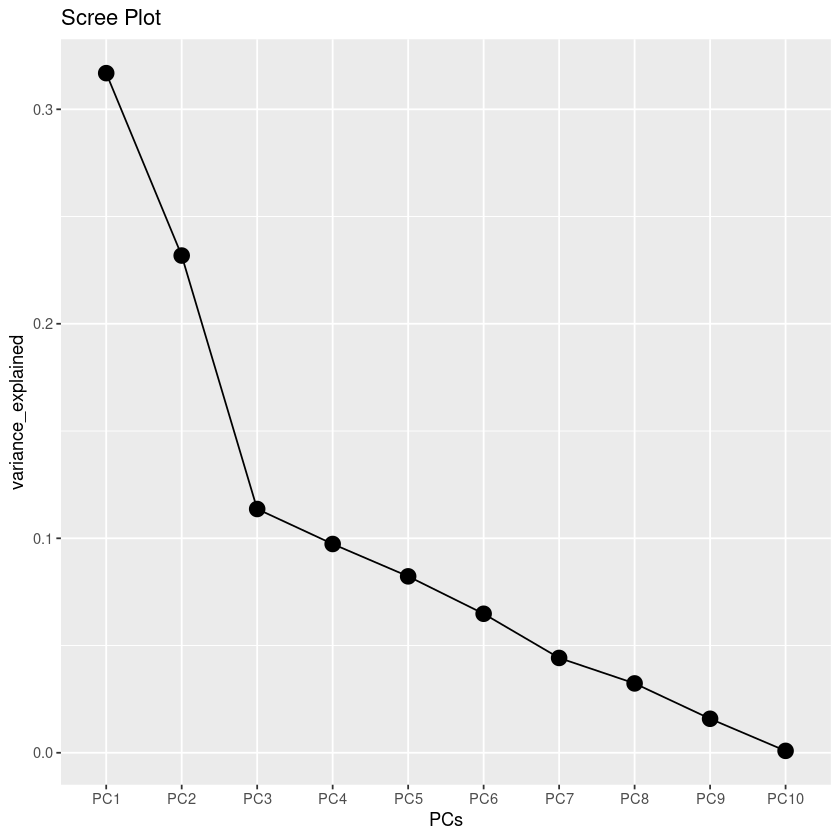

In [ ]:
percent_explained %>%
    ggplot(aes(x = factor(PC, level = c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10")), y = variance_explained, group = 1, )) +
    geom_point(size = 4) +
    geom_line() +
    ggtitle("Scree Plot") +
    xlab("PCs")

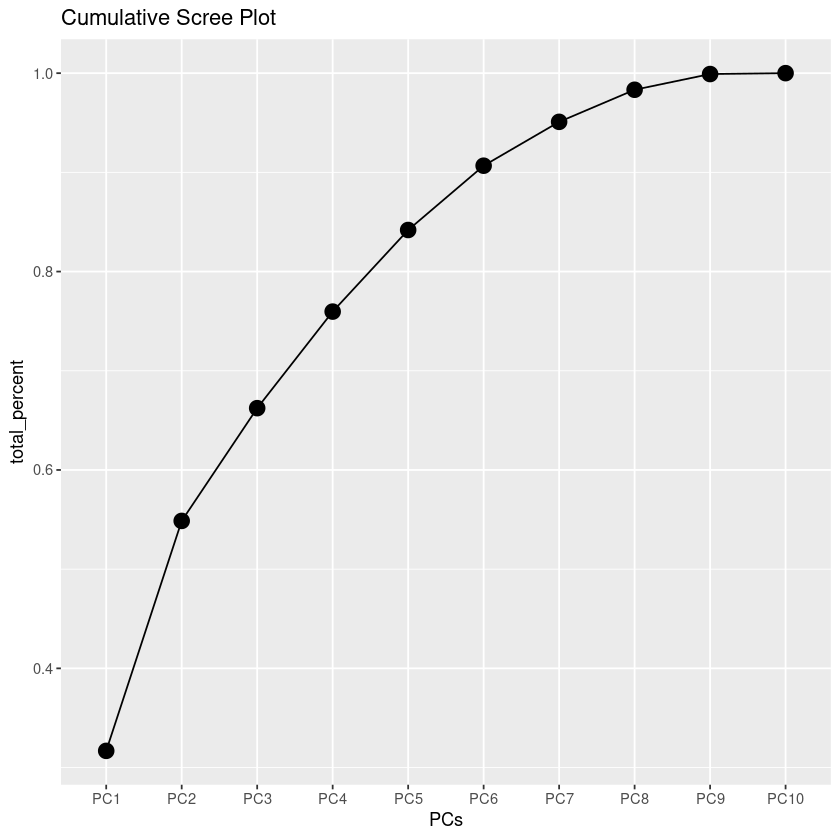

In [ ]:
percent_explained %>%
    ggplot(aes(x = factor(PC, level = c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10")), y = total_percent, group = 1, )) +
    geom_point(size = 4) +
    geom_line() +
    ggtitle("Cumulative Scree Plot") +
    xlab("PCs")

### We'll use 3

## Feature Selection

### Remove Variables That Don't Exceed sqrt(1/n) in PC 1-3

In [ ]:
sqrt(1 / 10)

[1] 0.3162278

In [ ]:
eigenvectors[, 1:3]

,PC1,PC2,PC3
has_computer,0.4898115,-0.2468622,-0.07696288
with_internet,0.5010888,-0.2295104,-0.06447828
work_from_home,0.2498171,-0.3026201,0.04409626
X65_and_older,0.2976291,-0.4261841,0.15302149
median_income,0.0737968,-0.1659468,-0.14728323
number_providers,-0.2184470,-0.3295805,-0.50595286
mean_lowest_cost,0.1616836,0.1707843,0.58453163
mean_d_mbps,0.3683984,0.4096731,-0.08315480
mean_u_mbps,0.1988716,0.2826412,-0.57034600
mean_lat_ms,-0.3216040,-0.4473535,0.11398274


### Remove work_from_home and median_income And Redo PCA

In [ ]:
data2.2 <- data %>% dplyr::select(-work_from_home,-median_income)
scaled_data2.2 <- scale(data2.2)
pca_data2.2 <- prcomp(data2.2, scale = TRUE, center = TRUE)
eigenvectors2.2 <- -pca_data2.2$rotation
eigenvalues2.2 <- pca_data2.2$sdev^2

## Create The Index

### Multiply Eigenvectors By Eigenvalues To Get Weights

In [ ]:
weights <- eigenvectors2.2[, 1:3]

for (i in 1:ncol(weights)) {
    weights[i, ] <- weights[i, ] * eigenvalues2.2[i]
}

In [ ]:
weights

,PC1,PC2,PC3
has_computer,1.3781844,-1.1700233,0.24552823
with_internet,0.9755071,-0.7664853,0.14365837
X65_and_older,0.2635078,-0.6016760,-0.16543816
number_providers,-0.2727747,-0.2963657,0.52529656
mean_lowest_cost,0.1934170,0.1266271,-0.58752257
mean_d_mbps,0.4369824,0.3411832,0.08107499
mean_u_mbps,0.2492243,0.2400401,0.57210681
mean_lat_ms,-0.3951587,-0.3953091,-0.11124764


#### Proof

In [ ]:
as.list(eigenvalues2.2)

[[1]]
[1] 3.0336

[[2]]
[1] 2.0872

[[3]]
[1] 1.132571

[[4]]
[1] 0.8070952

[[5]]
[1] 0.4457674

[[6]]
[1] 0.3257567

[[7]]
[1] 0.1588343

[[8]]
[1] 0.009175313

In [ ]:
eigenvectors2.2[, 1:3]

,PC1,PC2,PC3
has_computer,0.4543065,-0.3856880,0.08093625
with_internet,0.4673761,-0.3672314,0.06882829
X65_and_older,0.2326633,-0.5312478,-0.14607307
number_providers,-0.2727747,-0.2963657,0.52529656
mean_lowest_cost,0.1934170,0.1266271,-0.58752257
mean_d_mbps,0.4369824,0.3411832,0.08107499
mean_u_mbps,0.2492243,0.2400401,0.57210681
mean_lat_ms,-0.3951587,-0.3953091,-0.11124764


In [ ]:
3.03360026460269 * 0.4543065

[1] 1.378184

In [ ]:
2.08719956645967 * 0.4673761

[1] 0.9755072

In [ ]:
1.13257121503609 * 0.3856880

[1] 0.4368191

In [ ]:
weights

,PC1,PC2,PC3
has_computer,1.3781844,-1.1700233,0.24552823
with_internet,0.9755071,-0.7664853,0.14365837
X65_and_older,0.2635078,-0.6016760,-0.16543816
number_providers,-0.2727747,-0.2963657,0.52529656
mean_lowest_cost,0.1934170,0.1266271,-0.58752257
mean_d_mbps,0.4369824,0.3411832,0.08107499
mean_u_mbps,0.2492243,0.2400401,0.57210681
mean_lat_ms,-0.3951587,-0.3953091,-0.11124764


### Sum The Weights

In [ ]:
weights <- weights %>%
    as.data.frame() %>%
    transmute(weight = PC1 + PC2 + PC3)

weights

,weight
,<dbl>
has_computer,0.45368933
with_internet,0.35268022
X65_and_older,-0.50360634
number_providers,-0.04384384
mean_lowest_cost,-0.26747852
mean_d_mbps,0.85924065
mean_u_mbps,1.06137118
mean_lat_ms,-0.90171551


### Multiply Standardized Data By Weights

In [ ]:
index2 <- scaled_data2.2 %*% as.matrix(weights)
head(index2)

weight
-2.4143862
-1.5025430
-0.6294349
-1.9323299
-0.7089533
-1.1405124


In [ ]:
index_data2 <- bind_cols(scaled_data2.2, index2) %>%
    rename(index = weight)
head(index_data2)

has_computer,with_internet,X65_and_older,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.50245011,0.5167430,2.23493253,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,-2.4143862
0.88153598,0.9194434,2.28240921,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,-1.5025430
-0.19922325,-0.2714809,-0.74343819,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-0.6294349
-0.81523778,-0.9413759,0.05100501,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,-1.9323299
-0.07893639,-0.1913226,0.01302366,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,-0.7089533
0.28010167,0.1789328,0.88026444,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,-1.1405124


## Check Reliability

In [ ]:
library(ltm)
cronbach.alpha(index_data1.2)
cronbach.alpha(index_data2)


Cronbach's alpha for the 'index_data1.2' data-set

Items: 10
Sample units: 183
alpha: 0.644



Cronbach's alpha for the 'index_data2' data-set

Items: 9
Sample units: 183
alpha: 0.45


# PCA - Method 3

## Create Index Using Method 2

## Feature Selection Using Method 1

## Stepwise Regression For Final Coefficients

## Create The Index

In [ ]:
weights3 <- eigenvectors[, 1:3]

for (i in 1:ncol(weights3)) {
    weights3[i, ] <- weights3[i, ] * eigenvalues[i]
}
weights3

,PC1,PC2,PC3
has_computer,1.5519452,-0.7821715,-0.24385333
with_internet,1.1615533,-0.5320186,-0.14946446
work_from_home,0.2839149,-0.3439249,0.05011499
X65_and_older,0.2976291,-0.4261841,0.15302149
median_income,0.0737968,-0.1659468,-0.14728323
number_providers,-0.2184470,-0.3295805,-0.50595286
mean_lowest_cost,0.1616836,0.1707843,0.58453163
mean_d_mbps,0.3683984,0.4096731,-0.08315480
mean_u_mbps,0.1988716,0.2826412,-0.57034600
mean_lat_ms,-0.3216040,-0.4473535,0.11398274


### Sum The Weights

In [ ]:
weights3 <- weights3 %>%
    as.data.frame() %>%
    transmute(weight = PC1 + PC2 + PC3)

weights3

,weight
,<dbl>
has_computer,0.525920291
with_internet,0.480070233
work_from_home,-0.009895079
X65_and_older,0.024466485
median_income,-0.239433203
number_providers,-1.053980388
mean_lowest_cost,0.916999570
mean_d_mbps,0.694916744
mean_u_mbps,-0.088833144


### Create The Index

In [ ]:
index3 <- scaled_data %*% as.matrix(weights3)

head(index3)

weight
-2.95698064
-1.33761878
-1.43353792
0.07840303
1.37934232
-0.22469377


### Append To Dataframe

In [ ]:
index_data3 <- bind_cols(scaled_data, index3) %>%
    rename(index = weight)

head(index_data3)

has_computer,with_internet,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.50245011,0.5167430,0.1292741,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,-2.95698064
0.88153598,0.9194434,2.9303783,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,-1.33761878
-0.19922325,-0.2714809,-1.2814270,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-1.43353792
-0.81523778,-0.9413759,-1.0480017,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,0.07840303
-0.07893639,-0.1913226,-1.0784484,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,1.37934232
0.28010167,0.1789328,-0.1751938,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,-0.22469377


### Check The Index

In [ ]:
as.list(rcorr(as.matrix(index_data3), type = "pearson")$P[, 11])

$has_computer
[1] 0.000000000000009769963

$with_internet
[1] 0

$work_from_home
[1] 0.05038293

$X65_and_older
[1] 0.01275867

$median_income
[1] 0.3104728

$number_providers
[1] 0

$mean_lowest_cost
[1] 0

$mean_d_mbps
[1] 0

$mean_u_mbps
[1] 0.0002702083

$mean_lat_ms
[1] 0

$index
[1] NA

In [ ]:
rcorr(as.matrix(index_data3), type = "pearson")$P

,has_computer,with_internet,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
has_computer,NA,0.0000000000000000,0.0000000012988157,0.00000000000000,0.02755381,0.118292436762502007,0.142469388878,0.000025995933165657,0.007680971891602,0.0062836851041634,0.000000000000009769963
with_internet,0.000000000000000000000,NA,0.0000000002997904,0.00000000000000,0.03006990,0.082203264746717686,0.065587150157,0.000001719724394889,0.006902898453880,0.0012541075067722,0.000000000000000000000
work_from_home,0.000000001298815721640,0.0000000002997904,NA,0.00000004534735,0.62244972,0.692796119793770648,0.933508191298,0.672635578892659680,0.430093269468229,0.9085912323262459,0.050382930604004894093
X65_and_older,0.000000000000000000000,0.0000000000000000,0.0000000453473543,NA,0.04477147,0.476702946467304045,0.497188268940,0.569411922064836595,0.022030156319832,0.1693793288053427,0.012758668997874700324
median_income,0.027553811908482384041,0.0300698982044132,0.6224497181702566,0.04477147246482,NA,0.767570871280282230,0.469668921788,0.521089097196837159,0.807238517875172,0.4313383103711319,0.310472763929248163350
number_providers,0.118292436762502006786,0.0822032647467177,0.6927961197937706,0.47670294646730,0.76757087,NA,0.000005261423,0.000000000006029399,0.826929938720940,0.0000000002296336,0.000000000000000000000
mean_lowest_cost,0.142469388877797698001,0.0655871501573895,0.9335081912981513,0.49718826894047,0.46966892,0.000005261422731273,NA,0.007630242115620911,0.256184957503357,0.0141555670114635,0.000000000000000000000
mean_d_mbps,0.000025995933165656737,0.0000017197243949,0.6726355788926597,0.56941192206484,0.52108910,0.000000000006029399,0.007630242116,NA,0.000000013665493,0.0000000000000000,0.000000000000000000000
mean_u_mbps,0.007680971891601551249,0.0069028984538804,0.4300932694682289,0.02203015631983,0.80723852,0.826929938720939672,0.256184957503,0.000000013665493181,NA,0.0000000029104892,0.000270208345365618996
mean_lat_ms,0.006283685104163438950,0.0012541075067722,0.9085912323262459,0.16937932880534,0.43133831,0.000000000229633645,0.014155567011,0.000000000000000000,0.000000002910489,NA,0.000000000000000000000


In [ ]:
rcorr(as.matrix(index_data3), type = "pearson")$r

,has_computer,with_internet,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
has_computer,1.0000000,0.9894358,0.429532198,0.63073622,0.16291986,-0.11586967,0.10884185,0.30554032,0.19648189,-0.201306736,0.53144534
with_internet,0.9894358,1.0000000,0.444207496,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,0.19906151,-0.236716631,0.56259930
work_from_home,0.4295322,0.4442075,1.000000000,0.39074417,0.03663670,0.02939906,-0.00620995,0.03144231,-0.05867872,0.008545821,0.14487201
X65_and_older,0.6307362,0.6252921,0.390744170,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,-0.16920740,0.102017655,0.18378670
median_income,0.1629199,0.1604089,0.036636701,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,-0.01815921,0.058520706,-0.07538388
number_providers,-0.1158697,-0.1288266,0.029399058,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,-0.01627282,0.446802457,-0.73620015
mean_lowest_cost,0.1088418,0.1364058,-0.006209950,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,0.08436356,-0.181091388,0.57585454
mean_d_mbps,0.3055403,0.3450734,0.031442306,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,0.40439966,-0.831561029,0.77757861
mean_u_mbps,0.1964819,0.1990615,-0.058678724,-0.16920740,-0.01815921,-0.01627282,0.08436356,0.40439966,1.00000000,-0.421146282,0.26619642
mean_lat_ms,-0.2013067,-0.2367166,0.008545821,0.10201766,0.05852071,0.44680246,-0.18109139,-0.83156103,-0.42114628,1.000000000,-0.72065202


## Create New Dataset

In [ ]:
data3 <- data %>% dplyr::select(-median_income, -work_from_home)
scaled_data3 <- scale(data3)
pca_data3 <- prcomp(data3, scale = TRUE, center = TRUE)
eigenvectors3 <- -pca_data3$rotation
eigenvalues3 <- pca_data3$sdev^2

### Get New Weights

In [ ]:
weights3.2 <- eigenvectors3[, 1:3]

for (i in 1:ncol(weights3.2)) {
    weights3.2[i, ] <- weights3.2[i, ] * eigenvalues3[i]
}

weights3.2 <- weights3.2 %>%
    as.data.frame() %>%
    transmute(weight = PC1 + PC2 + PC3)

weights3.2

,weight
,<dbl>
has_computer,0.45368933
with_internet,0.35268022
X65_and_older,-0.50360634
number_providers,-0.04384384
mean_lowest_cost,-0.26747852
mean_d_mbps,0.85924065
mean_u_mbps,1.06137118
mean_lat_ms,-0.90171551


### Multiply New Weights Against Data

In [ ]:
index3.2 <- scaled_data3 %*% as.matrix(weights3.2)

head(index3.2)

weight
-2.4143862
-1.5025430
-0.6294349
-1.9323299
-0.7089533
-1.1405124


### Append To Dataframe

In [ ]:
index_data3.2 <- bind_cols(scaled_data3, index3.2) %>%
    rename(index = weight)

head(index_data3.2)

has_computer,with_internet,X65_and_older,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.50245011,0.5167430,2.23493253,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,-2.4143862
0.88153598,0.9194434,2.28240921,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,-1.5025430
-0.19922325,-0.2714809,-0.74343819,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-0.6294349
-0.81523778,-0.9413759,0.05100501,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,-1.9323299
-0.07893639,-0.1913226,0.01302366,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,-0.7089533
0.28010167,0.1789328,0.88026444,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,-1.1405124


## Stepwise Regression

In [ ]:
intercept3 <- lm(index_data3.2$index ~ 1, index_data3.2)
lm_data3 <- lm(index_data3.2$index ~ ., index_data3.2)

forward3 <- step(intercept3, direction = "forward", scope = formula(lm_data3), trace = 0)
backward3 <- step(lm_data3, direction = "backward", scope = formula(lm_data3), trace = 0)
both3 <- step(intercept3, direction = "both", scope = formula(lm_data3), trace = 0)

forward_bic3 <- step(intercept3, direction = "forward", scope = formula(lm_data3), trace = 0, k = log(nrow(index_data3)))
backward_bic3 <- step(lm_data3, direction = "backward", scope = formula(lm_data3), trace = 0, k = log(nrow(index_data3)))
both_bic3 <- step(intercept3, direction = "both", scope = formula(lm_data3), trace = 0, k = log(nrow(index_data3)))

Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


### Forward

In [ ]:
forward3


Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    mean_d_mbps + mean_lat_ms + has_computer + total_population + 
    number_providers + X65_and_older + work_from_home, data = index_data3.2)

Coefficients:
           (Intercept)           with_internet             mean_u_mbps  
-0.0000000000000005195   1.0526576754869811925   1.1939904361987245807  
           mean_d_mbps             mean_lat_ms            has_computer  
 0.6881421052964146190  -0.6947651246344695997   1.7009148881755427052  
      total_population        number_providers           X65_and_older  
 0.3917652256934771038   0.1682134633367980969  -0.1761106167240160114  
        work_from_home  
-0.0623652276685653234  


In [ ]:
forward_bic3


Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    mean_d_mbps + mean_lat_ms + has_computer + total_population + 
    number_providers + X65_and_older + work_from_home, data = index_data3.2)

Coefficients:
           (Intercept)           with_internet             mean_u_mbps  
-0.0000000000000005195   1.0526576754869811925   1.1939904361987245807  
           mean_d_mbps             mean_lat_ms            has_computer  
 0.6881421052964146190  -0.6947651246344695997   1.7009148881755427052  
      total_population        number_providers           X65_and_older  
 0.3917652256934771038   0.1682134633367980969  -0.1761106167240160114  
        work_from_home  
-0.0623652276685653234  


In [ ]:
forward3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,3064.4393816335059455013833940029144287,517.71848
+ with_internet,-1,2309.2726240,181,755.1667576628880169664626009762287140,263.39380
+ mean_u_mbps,-1,545.0171071,180,210.1496505560769207932025892660021782,31.31508
+ mean_d_mbps,-1,168.0626834,179,42.0869671293594578287411422934383154,-260.96389
+ mean_lat_ms,-1,18.9824707,178,23.1044964615602204105471173534169793,-368.71098
+ has_computer,-1,11.8828867,177,11.2216097328635360241833041072823107,-498.87100
+ total_population,-1,4.7544795,176,6.4671301836990160438745078863576055,-597.72393
+ number_providers,-1,2.9918274,175,3.4753028276105815130847531690960750,-709.37623
+ X65_and_older,-1,2.9617746,174,0.5135282622357131288026721449568868,-1057.29635


In [ ]:
forward_bic3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,3064.4393816335059455013833940029144287,520.92797
+ with_internet,-1,2309.2726240,181,755.1667576628880169664626009762287140,269.81277
+ mean_u_mbps,-1,545.0171071,180,210.1496505560769207932025892660021782,40.94353
+ mean_d_mbps,-1,168.0626834,179,42.0869671293594578287411422934383154,-248.12594
+ mean_lat_ms,-1,18.9824707,178,23.1044964615602204105471173534169793,-352.66355
+ has_computer,-1,11.8828867,177,11.2216097328635360241833041072823107,-479.61408
+ total_population,-1,4.7544795,176,6.4671301836990160438745078863576055,-575.25752
+ number_providers,-1,2.9918274,175,3.4753028276105815130847531690960750,-683.70034
+ X65_and_older,-1,2.9617746,174,0.5135282622357131288026721449568868,-1028.41098


In [ ]:
summary(forward3)

Warning message in summary.lm(forward3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    mean_d_mbps + mean_lat_ms + has_computer + total_population + 
    number_providers + X65_and_older + work_from_home, data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000071038 -0.0000000000000002299  0.0000000000000000363 
                    3Q                    Max 
 0.0000000000000004094  0.0000000000000023450 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000051951  0.00000000000000007007
with_internet     1.05265767548698119249  0.00000000000000052537
mean_u_mbps       1.19399043619872458066  0.00000000000000008556
mean_d_mbps       0.68814210529641461900  0.00000000000000013903
mean_lat_ms      -0.69476512463446959966  0.00000000000000013216
has_computer      1.70091488817554270518  0.00000000000000052081
total_population  0.39176522569347710379  0.00000000000000015860
nu

In [ ]:
summary(forward_bic3)

Warning message in summary.lm(forward_bic3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    mean_d_mbps + mean_lat_ms + has_computer + total_population + 
    number_providers + X65_and_older + work_from_home, data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000071038 -0.0000000000000002299  0.0000000000000000363 
                    3Q                    Max 
 0.0000000000000004094  0.0000000000000023450 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000051951  0.00000000000000007007
with_internet     1.05265767548698119249  0.00000000000000052537
mean_u_mbps       1.19399043619872458066  0.00000000000000008556
mean_d_mbps       0.68814210529641461900  0.00000000000000013903
mean_lat_ms      -0.69476512463446959966  0.00000000000000013216
has_computer      1.70091488817554270518  0.00000000000000052081
total_population  0.39176522569347710379  0.00000000000000015860
nu

### Backward

In [ ]:
backward3


Call:
lm(formula = index_data3.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + number_providers + 
    mean_d_mbps + mean_u_mbps + mean_lat_ms, data = index_data3.2)

Coefficients:
           (Intercept)            has_computer           with_internet  
-0.0000000000000005195   1.7009148881755424831   1.0526576754869809704  
      total_population          work_from_home           X65_and_older  
 0.3917652256934774369  -0.0623652276685653026  -0.1761106167240160392  
      number_providers             mean_d_mbps             mean_u_mbps  
 0.1682134633367982079   0.6881421052964155072   1.1939904361987241366  
           mean_lat_ms  
-0.6947651246344697107  


In [ ]:
backward_bic3


Call:
lm(formula = index_data3.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + number_providers + 
    mean_d_mbps + mean_u_mbps + mean_lat_ms, data = index_data3.2)

Coefficients:
           (Intercept)            has_computer           with_internet  
-0.0000000000000005195   1.7009148881755424831   1.0526576754869809704  
      total_population          work_from_home           X65_and_older  
 0.3917652256934774369  -0.0623652276685653026  -0.1761106167240160392  
      number_providers             mean_d_mbps             mean_u_mbps  
 0.1682134633367982079   0.6881421052964155072   1.1939904361987241366  
           mean_lat_ms  
-0.6947651246344697107  


In [ ]:
backward3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,173,0.0000000000000000000000000002350742,-12575.37


In [ ]:
backward_bic3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,173,0.0000000000000000000000000002350742,-12543.27


In [ ]:
summary(backward3)

Warning message in summary.lm(backward3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + number_providers + 
    mean_d_mbps + mean_u_mbps + mean_lat_ms, data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000076835 -0.0000000000000003443  0.0000000000000000499 
                    3Q                    Max 
 0.0000000000000004193  0.0000000000000038656 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000051951  0.00000000000000008617
has_computer      1.70091488817554248314  0.00000000000000064044
with_internet     1.05265767548698097045  0.00000000000000064605
total_population  0.39176522569347743685  0.00000000000000019504
work_from_home   -0.06236522766856530259  0.00000000000000010145
X65_and_older    -0.17611061672401603917  0.00000000000000012501
number_providers  0.16821346333679820795  0.00000000000000010322
me

In [ ]:
summary(backward_bic3)

Warning message in summary.lm(backward_bic3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + number_providers + 
    mean_d_mbps + mean_u_mbps + mean_lat_ms, data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000076835 -0.0000000000000003443  0.0000000000000000499 
                    3Q                    Max 
 0.0000000000000004193  0.0000000000000038656 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000051951  0.00000000000000008617
has_computer      1.70091488817554248314  0.00000000000000064044
with_internet     1.05265767548698097045  0.00000000000000064605
total_population  0.39176522569347743685  0.00000000000000019504
work_from_home   -0.06236522766856530259  0.00000000000000010145
X65_and_older    -0.17611061672401603917  0.00000000000000012501
number_providers  0.16821346333679820795  0.00000000000000010322
me

### Both

In [ ]:
both3


Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    mean_d_mbps + mean_lat_ms + has_computer + total_population + 
    number_providers + X65_and_older + work_from_home, data = index_data3.2)

Coefficients:
           (Intercept)           with_internet             mean_u_mbps  
-0.0000000000000005195   1.0526576754869811925   1.1939904361987245807  
           mean_d_mbps             mean_lat_ms            has_computer  
 0.6881421052964146190  -0.6947651246344695997   1.7009148881755427052  
      total_population        number_providers           X65_and_older  
 0.3917652256934771038   0.1682134633367980969  -0.1761106167240160114  
        work_from_home  
-0.0623652276685653234  


In [ ]:
both_bic3


Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    mean_d_mbps + mean_lat_ms + has_computer + total_population + 
    number_providers + X65_and_older + work_from_home, data = index_data3.2)

Coefficients:
           (Intercept)           with_internet             mean_u_mbps  
-0.0000000000000005195   1.0526576754869811925   1.1939904361987245807  
           mean_d_mbps             mean_lat_ms            has_computer  
 0.6881421052964146190  -0.6947651246344695997   1.7009148881755427052  
      total_population        number_providers           X65_and_older  
 0.3917652256934771038   0.1682134633367980969  -0.1761106167240160114  
        work_from_home  
-0.0623652276685653234  


In [ ]:
both3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,3064.4393816335059455013833940029144287,517.71848
+ with_internet,-1,2309.2726240,181,755.1667576628880169664626009762287140,263.39380
+ mean_u_mbps,-1,545.0171071,180,210.1496505560769207932025892660021782,31.31508
+ mean_d_mbps,-1,168.0626834,179,42.0869671293594578287411422934383154,-260.96389
+ mean_lat_ms,-1,18.9824707,178,23.1044964615602204105471173534169793,-368.71098
+ has_computer,-1,11.8828867,177,11.2216097328635360241833041072823107,-498.87100
+ total_population,-1,4.7544795,176,6.4671301836990160438745078863576055,-597.72393
+ number_providers,-1,2.9918274,175,3.4753028276105815130847531690960750,-709.37623
+ X65_and_older,-1,2.9617746,174,0.5135282622357131288026721449568868,-1057.29635


In [ ]:
both_bic3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,3064.4393816335059455013833940029144287,520.92797
+ with_internet,-1,2309.2726240,181,755.1667576628880169664626009762287140,269.81277
+ mean_u_mbps,-1,545.0171071,180,210.1496505560769207932025892660021782,40.94353
+ mean_d_mbps,-1,168.0626834,179,42.0869671293594578287411422934383154,-248.12594
+ mean_lat_ms,-1,18.9824707,178,23.1044964615602204105471173534169793,-352.66355
+ has_computer,-1,11.8828867,177,11.2216097328635360241833041072823107,-479.61408
+ total_population,-1,4.7544795,176,6.4671301836990160438745078863576055,-575.25752
+ number_providers,-1,2.9918274,175,3.4753028276105815130847531690960750,-683.70034
+ X65_and_older,-1,2.9617746,174,0.5135282622357131288026721449568868,-1028.41098


In [ ]:
summary(both3)

Warning message in summary.lm(both3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    mean_d_mbps + mean_lat_ms + has_computer + total_population + 
    number_providers + X65_and_older + work_from_home, data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000071038 -0.0000000000000002299  0.0000000000000000363 
                    3Q                    Max 
 0.0000000000000004094  0.0000000000000023450 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000051951  0.00000000000000007007
with_internet     1.05265767548698119249  0.00000000000000052537
mean_u_mbps       1.19399043619872458066  0.00000000000000008556
mean_d_mbps       0.68814210529641461900  0.00000000000000013903
mean_lat_ms      -0.69476512463446959966  0.00000000000000013216
has_computer      1.70091488817554270518  0.00000000000000052081
total_population  0.39176522569347710379  0.00000000000000015860
nu

In [ ]:
summary(both_bic3)

Warning message in summary.lm(both_bic3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    mean_d_mbps + mean_lat_ms + has_computer + total_population + 
    number_providers + X65_and_older + work_from_home, data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000071038 -0.0000000000000002299  0.0000000000000000363 
                    3Q                    Max 
 0.0000000000000004094  0.0000000000000023450 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000051951  0.00000000000000007007
with_internet     1.05265767548698119249  0.00000000000000052537
mean_u_mbps       1.19399043619872458066  0.00000000000000008556
mean_d_mbps       0.68814210529641461900  0.00000000000000013903
mean_lat_ms      -0.69476512463446959966  0.00000000000000013216
has_computer      1.70091488817554270518  0.00000000000000052081
total_population  0.39176522569347710379  0.00000000000000015860
nu

# Cluster Analysis on Chosen Model

In [ ]:
new_data <- read.csv("../data/combined_data.csv") %>%
    dplyr::select(NAME, GEOID)
cluster_data <- bind_cols(new_data, index_data2)

dist_data <- dist(index_data2, method = "euclidean")
hclust_avg <- hclust(dist_data, method = "average")
cut_avg <- cutree(hclust_avg, k = 5)

In [ ]:
cluster <- kmeans(index_data2, centers = 5, nstart = 25)
cluster

K-means clustering with 5 clusters of sizes 32, 40, 16, 45, 50

Cluster means:
  has_computer with_internet total_population X65_and_older number_providers
1    1.2398906    1.27514620        1.2690111    1.20528192      -0.22450014
2   -0.7402863   -0.81693958       -0.6443264   -0.13755656       0.71902381
3    1.4761358    1.40468785        1.1937309    0.02706885       0.07965296
4   -0.5842222   -0.58100253       -0.5307594   -0.23575417      -0.06242945
5   -0.1478644   -0.08913974       -0.2010165   -0.45781845      -0.40084140
  mean_lowest_cost mean_d_mbps mean_u_mbps mean_lat_ms     index
1      -0.02249149  0.43504961  -0.1678420  -0.2966951  2.999362
2      -0.49490556 -1.48304958  -0.8180604   1.4601489 -4.933530
3      -0.03142816  0.69778366   1.7666667  -0.5959075  6.176999
4       0.23952773 -0.01425485  -0.2641321  -0.1775674 -1.449290
5       0.20480106  0.69754651   0.4342527  -0.6277332  1.354954

Clustering vector:
  [1] 4 1 4 4 4 4 5 5 4 5 5 5 5 3 1 3 3 5 4 5 3 3

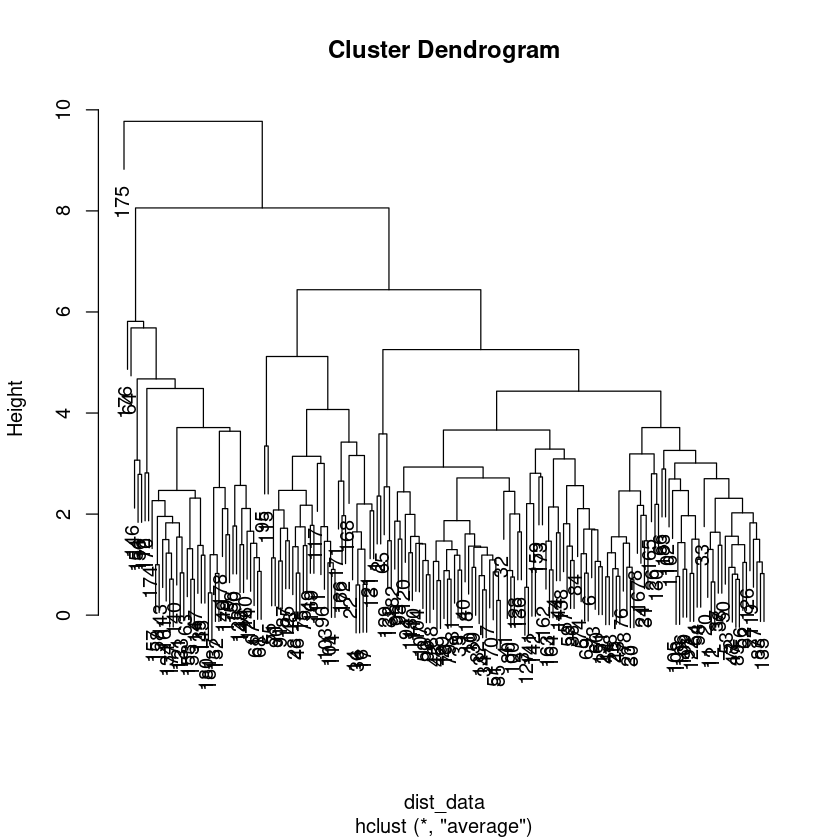

In [ ]:
plot(hclust_avg)

In [ ]:
new_data <- as.data.frame(lapply(new_data, unlist))

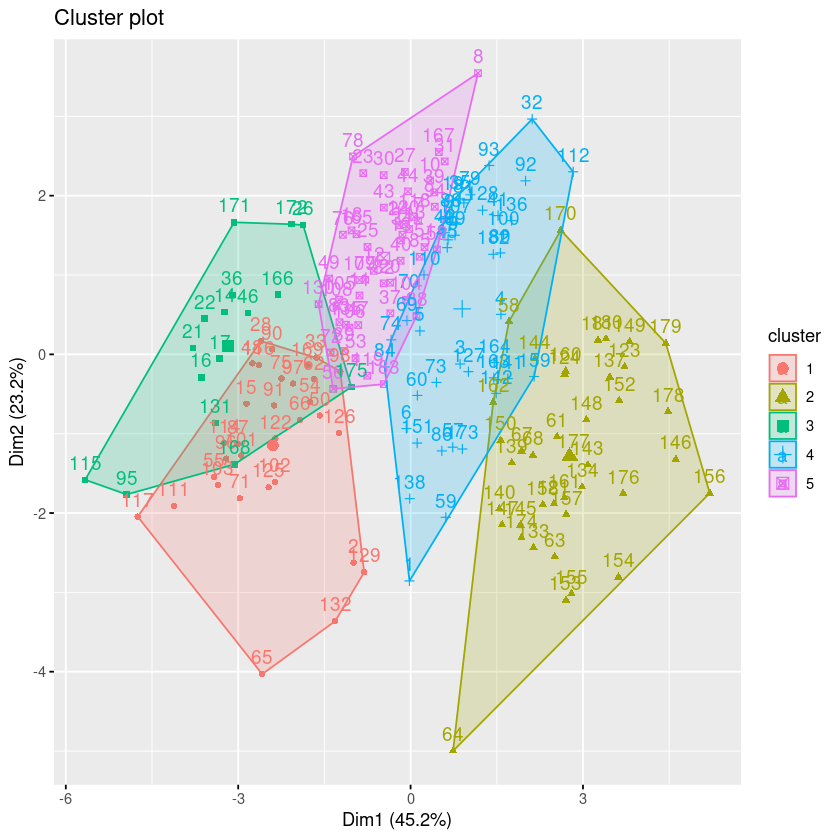

In [ ]:
library(factoextra)
fviz_cluster(cluster, data = index_data2)